In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from tqdm import tqdm
from copy import deepcopy

In [46]:
# 시작점, 끝점을 하나의 넘파이로 합쳐놓기(테스트를 위해 시작점 2를 삽입없이 합치는 기능도 넣음)
def start_end_marge (end_point, start_point_1, start_point_2 = False):
    n = 2
    SE = np.array([])
    SE = np.append(SE, end_point)
    SE = np.append(SE, start_point_1)
    if (start_point_2 != False):
        SE = np.append(SE, start_point_2)
        n = 3
    SE = np.reshape(SE, (n, 2))
        
    return SE, n

In [47]:
#input_spot = int(input('input_spot(int) : '))
#input_range = float(input('input_range(float) : '))
#input_eps = float(input('input_eps(float) : '))
#input_min = int(input('input_min(int) : '))
input_spot = 25
input_range = 20
input_eps = 0.45
input_min  = 2
min_range = 0
max_range = 100

start_point_1 = (max_range - min_range) * np.random.random_sample(2) + min_range
#start_point_1 = [0.0, 0.0]
start_point_2 = [0.0, 0.0]
end_point = (max_range - min_range) * np.random.random_sample(2) + min_range
#end_point = [100.0, 100.0]

SE, SE_n = start_end_marge(end_point, start_point_1)

# 랜덤 스팟 생성

In [48]:
def make_random_spot (input_spot, min_range, max_range, input_x, rseed=None):
    if(rseed != None):
        np.random.seed(rseed)
        
    var = ['X', 'Y']
    labels=['spot0']
    for i in range(0,input_spot-1):
        z = 'spot'+str(i+1)
        labels.append(z)
        
    # X를 사전에 만들어둔게 없으면 랜덤으로 만들어줌
    # 만들어둔게 있다면 X를 input_x에 입력받아서 데이터 프레임 만들 때 사용
    if len(input_x) == 0:
        X = (max_range - min_range) * np.random.random_sample([input_spot,2]) + min_range
    else:
        X = input_x
    df = pd.DataFrame(X, columns = var, index = labels)
    
    return labels, X, df

In [49]:
def x(input_spot):
    in_x = [[151, 30], [6, 77], [118, 145], [13, 134], [80, 41], [119, 67], [28, 0], [148, 200], [22, 68], [134, 119], [194, 27], [128, 39], [103, 21], [8, 30], [57, 173], [86, 89], [22, 76], [48, 191], [186, 1], [38, 185], [116, 182], [198, 136], [41, 106], [126, 109], [155, 70], [102, 114], [21, 165], [23, 44], [123, 49], [183, 100], [2, 165], [150, 80], [80, 68], [190, 178], [93, 200], [89, 22], [177, 129], [78, 153], [151, 72], [141, 192], [195, 87], [73, 156], [180, 90], [120, 129], [126, 66], [70, 31], [43, 179], [111, 124], [0, 110], [119, 50], [174, 133], [128, 85], [120, 137], [145, 165], [72, 183], [21, 188], [100, 42], [40, 183], [118, 27], [168, 50], [43, 130], [98, 160], [181, 83], [125, 131], [94, 99], [45, 120], [24, 3], [82, 165], [174, 93], [85, 28], [87, 122], [174, 159], [12, 18], [66, 192], [189, 26], [56, 12], [92, 104], [15, 48], [92, 22], [190, 111], [27, 166], [45, 56], [64, 12], [186, 88], [105, 46], [114, 86], [190, 107], [59, 150], [178, 89], [200, 58], [136, 69], [160, 140], [188, 137], [169, 31], [135, 78], [126, 64], [41, 113], [66, 146], [10, 117], [191, 185]]
    input_x = np.array(in_x)
    input_spot = len(input_x)
    return input_x, input_spot

In [50]:
X, in_spot = x(input_spot)

# 랜덤한 값을 받을거면 input_x 자리에 [] 입력하고 아니라면 X를 입력하면 됨 (seed == 111)
labels, X, df = make_random_spot(input_spot, min_range, max_range, [])

# 군집 + 덴드로그램 출력

In [51]:
def hierarchical_dendrogram(df, labels, input_spot=0, row_dist_print=False, a_print=False, dendrogram_print=False):
    
    distmatrix = pdist(df, metric = 'euclidean')
    row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
    
    if(input_spot == 0):
        print('row_dist 반환')
        return row_dist
    
    row_clusters = linkage(distmatrix, method = 'complete')
    
    if(row_dist_print == True):
        print_col = row_dist.iloc[:5,:5]
        print(print_col)
        
    if(a_print == True):
        a=pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index = ['클러스터 %d' %(i+input_spot) for i in range(row_clusters.shape[0])])
        print(a[:5])
        
    if(dendrogram_print == True):
        plt.figure(figsize=(25,5))
        plt.subplot(121)
        plt.title('dendrogram')
        row_dendr = dendrogram(row_clusters, labels = labels)
        plt.tight_layout()
        plt.ylabel('euclide')
    
    return row_clusters

In [52]:
row_clusters = hierarchical_dendrogram(df, labels, input_spot)

# 군집별 넘버링 함수 + 출력

In [53]:
def cluster_numbering(row_clusters, input_range):
    # 넘버링에 필요한 재귀함수
    def found_num(Num, count, h):
        # ↓이미 넘버링 끝났는지 확인(끝났으면 0이므로 탈출, 아니면 지금 넘버링 시작이니 0으로 지정)
        if(iHave[Num][3]==0):
            return -1
        else:
            iHave[Num][3] = 0
            
        # 왼쪽 자식 확인
        if(iHave[Num][0] < h):
            cluster_done[int(iHave[Num][0])] = count
        else: #재귀
            left = int(iHave[Num][0]) - h
            found_num(left,count,h)
            
        # 오른쪽 자식 확인
        if(iHave[Num][1] < h):
            cluster_done[int(iHave[Num][1])] = count
        else: #재귀
            right = int(iHave[Num][1]) - h
            found_num(right,count,h)
        return
    
    rc_len = len(row_clusters)
    for i in range(0, rc_len):
        if(row_clusters[i][2] > float(input_range)):
            iHave = row_clusters[:i,:]
            num = i - 1 #몇 번의 합치기가 되었는지 저장
            break
            
    # 빈 리스트를 군집 개수 만큼 생성
    h = rc_len + 1
    cluster_done = [-1 for _ in range(h)]
    
    
    # 재귀 함수 호출
    count = 1
    for i in range(num, -1, -1):
        cycle = found_num(i, count, h)
        if (cycle != -1):
            count += 1
    
    return cluster_done

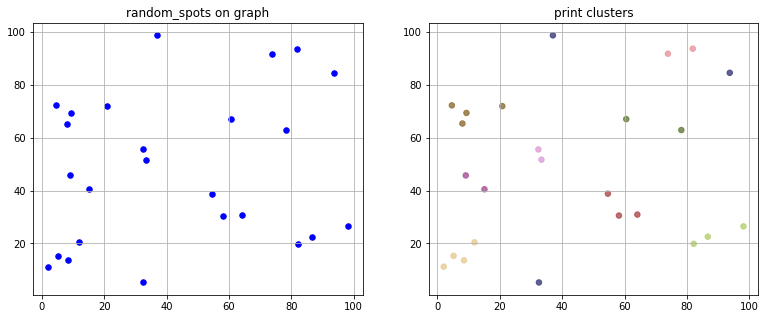

In [54]:
cluster_done = cluster_numbering(row_clusters.copy(), input_range)

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('random_spots on graph')
plt.scatter(X[:,0], X[:,1], c = 'blue', marker = 'o', s = 30)
plt.grid(True)

#점에 번호 붙여주는 기능↓ 나중에 주석 제거해서 사용가능
"""for i in range(0,input_spot):
    str_val = "(%.1f,%.1f)-%s"%(X[i,0], X[i,1], labels[i])
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')"""

"""for i in range(0,input_spot):
    if(i == 0):
        str_val = "%s"%(labels[i])
    else:
        str_val = "0"
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'top')"""

plt.subplot(122)
plt.title('print clusters')
plt.scatter(X[:,0], X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.grid(True)

plt.show()

# 군집별 중앙 값 검색(함수, 정렬, 중심찾기)

In [55]:
def quick_sort(centroid_X):
    def sort(low, high):
        if high <= low:
            return
        
        mid = partition(low, high)
        sort(low, mid - 1)
        sort(mid, high)
    
    def partition(low, high):
        pivot = centroid_X[(low + high) // 2][2]
        while low <= high:
            while centroid_X[low][2] < pivot:
                #print(centroid_X[low][2], low, pivot)
                low += 1
            while centroid_X[high][2] > pivot:
                high -= 1
            if low <= high:
                centroid_X[low][2], centroid_X[high][2] = centroid_X[high][2].copy(), centroid_X[low][2].copy()
                centroid_X[low][1], centroid_X[high][1] = centroid_X[high][1].copy(), centroid_X[low][1].copy()
                centroid_X[low][0], centroid_X[high][0] = centroid_X[high][0].copy(), centroid_X[low][0].copy()
                low, high = low + 1, high - 1
        return low
    
    return sort(0, len(centroid_X) - 1)

def marge_n_sort (input_spot, X, cluster_done):
    # 중앙 좌표 저장을 위한 numpy배열 생성(-1.0으로 모두 채움)
    centroid_X = np.full((input_spot, 3), -1.0)
    
    #스팟 좌표+소속 군집 번호
    for i in range(input_spot):
        centroid_X[i][0] = X[i][0]
        centroid_X[i][1] = X[i][1]
        centroid_X[i][2] = cluster_done[i]
    
    non_sort_centroid = centroid_X.copy()
    quick_sort(centroid_X)
    
    #노이즈 좌표 + 노이즈 번호(노이즈는 모두 -1)
    """for i in range(drop_len):
        non_sort_centroid = np.append(non_sort_centroid, (drop_list[i][0],drop_list[i][1],-1.0))
        centroid_X = np.append(centroid_X, (drop_list[i][0],drop_list[i][1],-1.0))"""
    
    non_sort_centroid = np.reshape(non_sort_centroid, (input_spot,3))
    centroid_X = np.reshape(centroid_X, (input_spot,3))
    
    return centroid_X, non_sort_centroid

In [56]:
def make_centroid(centroid_X):
    # 중심 좌표 계산
    count = 1
    sumx = sumy = 0.0
    centroid = np.array([])
    shape = 0
    
    for i in range(len(centroid_X)):
        if(centroid_X[i][2] == -1):
            continue
        
        sumx += centroid_X[i][0]
        sumy += centroid_X[i][1]
        count += 1
        if (i == len(centroid_X)-1) or (centroid_X[i][2] != centroid_X[i+1][2]):
            centroid = np.append(centroid, [sumx / float(count-1),sumy / float(count-1)])
            count = 1
            sumx = sumy = 0
            shape = int(centroid_X[i][2])
    
    centroid = np.reshape(centroid, (shape,2))
    
    return centroid

In [57]:
centroid_X, non_sort_centroid = marge_n_sort (input_spot, X, cluster_done)
centroid = make_centroid(centroid_X)
#print(len(centroid))
#print(centroid_X)

#  계층 군집되지 못한 노드들을 분리

In [58]:
def make_drop(new_X, new_cluster_done):
    drop_list = np.array([])
    drop_len = 0
    
    J = len(new_cluster_done)-1
    i = 0
    
    while True:
        if i >= J:
            break
        if new_cluster_done[i] == -1:
            del new_cluster_done[i]
            drop_list = np.append(drop_list, new_X[i])
            new_X = np.delete(new_X, i, axis = 0)
            drop_len += 1
            i -= 1
            J -= 1
        i += 1
    drop_list = drop_list.reshape(drop_len, 2)
    
    return new_X, drop_list, drop_len, new_cluster_done

In [59]:
new_X, drop_list, drop_len, new_cluster_done = make_drop(X.copy(), deepcopy(cluster_done))

# 최종 출력

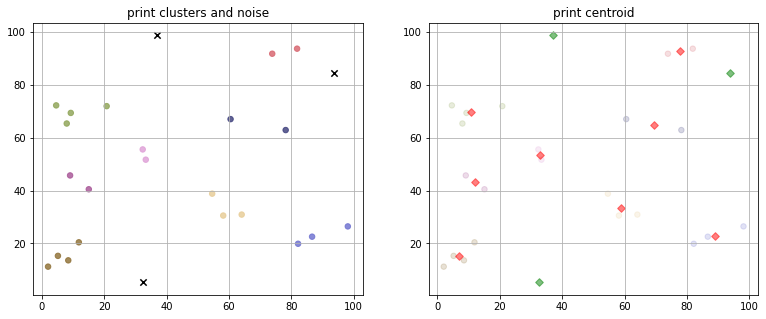

In [60]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('print clusters and noise')

plt.scatter(new_X[:,0], new_X[:,1], c=new_cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'x', s=40, color = 'black')
plt.grid(True)


plt.subplot(122)
plt.title('print centroid')

plt.scatter(new_X[:,0], new_X[:,1], c=new_cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.2)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'D', s=30, color = 'green', alpha = 0.5)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s=30, color = 'red', alpha = 0.5)
plt.grid(True)


plt.show()

# cenoise (군집 중심 + 노이즈만 합친 넘파이)
그리고 시작점, 끝점도 합쳐줌

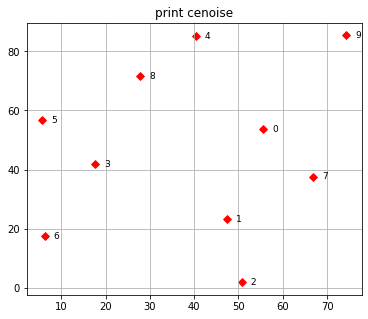

In [17]:
cenoise = np.append(drop_list, centroid)
cenoise = np.reshape(cenoise, (drop_len+len(centroid),2))

plt.figure(figsize=(6,5))
for i in range(len(cenoise)):
    str_val = "%s"%str(i)
    plt.text(cenoise[i,0]+2, cenoise[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')

plt.title('print cenoise')
plt.scatter(cenoise[:, 0], cenoise[:, 1], marker = 'D', s=30, color = 'red')
plt.grid(True)
plt.show()

# cenoise에 시작점, 끝점 합침
cenoise = np.append(cenoise, SE)
cenoise = np.reshape(cenoise, (drop_len+len(centroid)+SE_n,2))

# coordinate_1 (각 스팟의 이동해야할 위치 배열 저장)

In [18]:
coordinate_1 = np.array([])
for i in range(len(non_sort_centroid)):
    n = int(non_sort_centroid[i][2])
    if(n != -1):
        coordinate_1 = np.append(coordinate_1, centroid[n-1].copy())
    else:
        coordinate_1 = np.append(coordinate_1, non_sort_centroid[i][:2].copy())

coordinate_1 = np.reshape(coordinate_1, (input_spot,2))
#print(coordinate_1)

# 길찾기 전 cenoise노드들 간의 모든 유클리디언 거리 계산

In [19]:
var = ['X', 'Y']
cen_labels = ['cen0']
for i in range(0,len(cenoise)-1):
    z = 'cen'+str(i+1)
    cen_labels.append(z)
        
cenoise_df = pd.DataFrame(cenoise, columns = var, index = cen_labels)
cenoise_row_dist = hierarchical_dendrogram(cenoise_df, cen_labels)

print(cenoise_row_dist.iloc[:5,:5])

row_dist 반환
           cen0       cen1       cen2       cen3       cen4
cen0   0.000000  31.660740  52.211815  39.716993  34.761566
cen1  31.660740   0.000000  21.632074  35.105507  62.290553
cen2  52.211815  21.632074   0.000000  51.881570  83.910615
cen3  39.716993  35.105507  51.881570   0.000000  48.868522
cen4  34.761566  62.290553  83.910615  48.868522   0.000000


# 계산된 유클리디언 거리를 노드1, 노드2, 거리 형식의 numpy로 변환

In [20]:
cenoise_eu = np.array([])

for i in range(len(cenoise)):
    for j in range(len(cenoise)):
        if(i <= j):
            break
        cenoise_eu = np.append(cenoise_eu, [i,j,cenoise_row_dist['cen'+str(i)]['cen'+str(j)]])
        
# 행렬의 크기는 노드수*(노드수-1)/2
m = int(len(cenoise)*(len(cenoise)-1)/2)
cenoise_eu = np.reshape(cenoise_eu, (m,3))

quick_sort(cenoise_eu)
#print(cenoise_eu[:5])

# kruskal 알고리즘(제일 거리가 짧은 선부터 연결)

### 출발, 도착점을 테이블과 그래프에 추가하는 함수
출발점과 도착점에서 가장 가까운 노드를 검색하고 연결할 뒤 테이블에 저장

In [21]:
'''시작점 1개일 때의 경우만 고려함'''

# 시작점과 도착점 각각 가장 먼저 언급 된 선을 찾아서 테이블의 2개의 선으로 따로 삽입함
# 연결된 노드들의 순서가 시작점, 출발점이 가장 처음과 끝이 되도록 하기 위한 작업
def set_point(cenoise_eu, table, len_cenoise):
    start, end = len_cenoise-1, len_cenoise-2
    found_start = 0
    found_end = 0
    take_node = 0 # 출발점과 도착점이 연결하려는 노드가 같은지 검사하기 위해 저장하는 변수
    
    for i in range(0,len(cenoise_eu)-1):
        if (found_start + found_end == 2):
            break
            
        m = cenoise_eu[i]
        m0, m1 = int(m[0]), int(m[1])
        
        # 출발점 찾기
        if(m0 == start or m1 == start):
            if (found_start == 0):
                # 연결하려는 간선이 출발, 도착점을 잇는 간선이라면 무시하고 넘어감
                if(m0 == end or m1 == end):
                    continue
                # 연결하려는 노드가 이미 도착점과 연결 되었다면 무시하고 넘어감
                if(m0 == start) and (m1 == take_node):
                    continue
                elif(m1 == start) and (m0 == take_node):
                    continue
                
                m_start = m.copy()
                # 출발점이 항상 왼쪽에 와야 하므로  2가지 경우 다르게 삽입
                if (m0 == start):
                    table.append([m[0], m[1]])
                    take_node = m1
                else:
                    table.append([m[1], m[0]])
                    take_node = m0
                found_start = 1
        # 도착점 찾기
        elif(m0 == end or m1 == end):
            if (found_end == 0):
                # 연결하려는 간선이 출발, 도착점을 잇는 간선이라면 무시하고 넘어감
                if(m0 == start or m1 == start):
                    continue
                # 연결하려는 노드가 이미 출발점과 연결 되었다면 무시하고 넘어감
                if(m0 == end) and (m1 == take_node):
                    continue
                elif(m1 == end) and (m0 == take_node):
                    continue
                
                m_end = m.copy()
                # 도착점이 항상 오른쪽에 와야 하므로  2가지 경우 다르게 삽입
                if (m0 == end):
                    table.append([m[1], m[0]])
                    take_node = m1
                else:
                    table.append([m[0], m[1]])
                    take_node = m0
                found_end = 1
           
    return table, m_start, m_end

### 싸이클 찾는 함수
싸이클이 아니라면 연결할 노드들이 테이블 내에 존재하는지 찾은 다음 해당 위치를 반환

In [22]:
# 싸이클 찾기(싸이클 존재 시 -1 반환, 싸이클 없다면 len(table_num)==0 반환, 싸이클 없고 연결할 노드 위치 찾으면 array 반환)
def find_cycle (table, node):
    count = 0
    table_num = [] # 몇번 째 테이블 행에 연결할 노드가 있는지 반환
    
    # table에 아무것도 없으므로 찾을 싸이클도 없기 때문에 len(table_num)==0 반환
    if(len(table) == 0):
        return table_num
    
    for i in range(len(table)):
        for j in range(len(table[i])):
            if(table[i][j] == node[0] or table[i][j] == node[1]):
                count += 1
            # 싸이클 없고 연결할 노드 찾음
            if(j == len(table[i])-1 and count == 1):
                table_num.append(i)
                count = 0
            # 싸이클 발견
            if(count == 2):
                return -1
    
    return table_num

### 간선을 추가하는 함수
1. 싸이클 찾는 함수에서 연결할 노드를 찾지 못했다면 테이블에 새롭게 추가하고 종료(노드 2개를 등록)
2. 연결할 노드 1개를 찾았다면 테이블에서 해당 위치에 새로운 노드를 추가하고 종료(노드 1개를 등록)
3. 연결할 노드 2개를 찾았다면 테이블에 존재하는 2개의 서로다른 행렬을 이어서 하나의 행으로 만들고 종료(행 2개를 합침)

In [23]:
def connect_line(table, node, len_cenoise, tri_sum, table_num = False):
    # 존재하는 집합이 없음으로 테이블에 추가하고 종료
    if(table_num == False):
        table.append([node[0], node[1]])
        return table
    
    # 테이블에 존재하는 노드를 1개만 찾은 경우와 2개 모두를 찾은 경우
    if(len(table_num) == 1):
        k = table_num[0]
        
        # 왼쪽 노드가 집합에 있고 인덱스가 0이면 앞에 오른쪽 노드 삽입, 인덱스가 리스트 끝 이면 맨 뒤에 오른쪽 노드 삽입
        if node[0] in table[k]:
            if(table[k].index(node[0]) == 0):
                table[k].insert(0, node[1])
            else:
                table[k].extend([node[1]])
        else:
            if(table[k].index(node[1]) == 0):
                table[k].insert(0, node[0])
            else:
                table[k].extend([node[0]])
    else:        
        l1, l2 = table_num[0], table_num[1]
        
        # 찾은 테이블 위치 2개에 시작점, 끝점이 포함된 경우 간선 낙오가 발생할 수 있으므로 패스
        if (len_cenoise-1 in table[l1]) and (len_cenoise-2 in table[l2]) and (not tri_sum):
            return -1
        elif (len_cenoise-1 in table[l2]) and (len_cenoise-2 in table[l1]) and(not tri_sum):
            return -1
        
        # 왼쪽 노드가 2개의 집합중 1번에 존재하는지, 2번에 존재하는지 확인
        # 1번에 존재하면 오른쪽 노드는 무조건 2번에 존재하게 됨. 반대도 마찬가지
        if node[0] in table[l1]:
            n1 = table[l1].index(node[0])
            n2 = table[l2].index(node[1])
        elif node[0] in table[l2]:
            n2 = table[l2].index(node[0])
            n1 = table[l1].index(node[1])
        # n1과 n2가 같은 경우는 도착 노드와 관계가 있기 때문임
        # 따라서 이 경우 하나의 경로를 거꾸로 뒤집어서 붙여줄 필요가 있음
        if(n1 == n2):
            if (n1 == n2 == 0):
                table[l2].reverse()
                table[l2].extend(table[l1])
                table.remove(table[l1])
            else:
                table[l1].reverse()
                table[l1].extend(table[l2])
                table.remove(table[l2])
            
        # 각 행에서 연결할 노드는 좌우 끝 중 하나임 따라서 하나는 0, 하나는 인덱스 끝 값임
        # 만약 인덱스1(n1)이 인덱스2 보다 작다면 n1==0, n2==end of list 라는 뜻. 
        # n2 뒤에 n1이 붙어야 하므로 붙이고, 뒤에 붙은 집합은 전체 테이블에서 삭제
        elif(n1 < n2):
            table[l2].extend(table[l1])
            table.remove(table[l1])
        else:
            table[l1].extend(table[l2])
            table.remove(table[l2])
    
    return 0

### 그래프에 선을 그리는 함수
1. 그래프에 직선을 그림
2. 경로 저장을 위해 shortest에 간선 데이터를 추가해줌

In [24]:
# 선 긋고 해당 노드의 tri 리스트에 간선수를 1개씩 더해줌, 최단 경로 산출용 선을 shortest에 삽입
def draw_line(tri, cenoise, m0, m1, m, shortest):
    lin = np.zeros((2,2)) #그래프 간선 출력용 array : line
    
    lin[0] = (cenoise[m0][0], cenoise[m1][0])
    lin[1] = (cenoise[m0][1], cenoise[m1][1])
    
    plt.plot(lin[0], lin[1], marker = 'o', color = 'olive', zorder = 1)
    
    tri[m0] += 1.0
    tri[m1] += 1.0
    
    shortest = np.append(shortest, m)
    
    return tri, shortest

### kruskal 알고리즘을 돌려주는 함수

In [25]:
def kruskal (tri, shortest, table, cenoise_eu, len_cenoise):
    # 시작.끝을 제외하고 모든 노드는 2개씩의 간선을 가지며 시작.끝은 1개씩만 가짐
    # 시작점이 2개라면 끝점의 간선은 2개가 됨. 결국 시작점이 1개 추가되어도 
    # 간선 1개를 갖는 노드는 언제나 2개이기 때문에 공식은 항상 똑같이 2를 빼주고 더해줌
    roop_stop = 2*(len_cenoise-2)+2
    is_break = 0
    
    for i in range(len(cenoise_eu)):
        if(np.sum(tri) == roop_stop):
            is_break = 1
            break # 모든 연결 끝. 종료
        
        m = cenoise_eu[i]
        m0, m1 = int(m[0]), int(m[1])
        
        # 간선을 연결할 노드 중 하나라도 이미 2개의 간선을 가졌다면 긋지 않고 패스
        # 시작점 노드는 간선 1개만 가져도 패스
        if(tri[m0] == 2.0 or tri[m1] == 2.0): # 각 노드는 간선 2개씩
            continue
        if(m0 == len_cenoise-1 or m1 == len_cenoise-1): # 출발 노드는 간선 1개
            if(tri[m0] == 1.0 or tri[m1] == 1.0):
                continue
        if(m0 == len_cenoise-2 or m1 == len_cenoise-2): # 도착 노드는 간선 1개
            if(tri[m0] == 1.0 or tri[m1] == 1.0):
                continue
                
        #마지막 간선인 경우  tri_sum==True 아니면 False
        tri_sum = True if (np.sum(tri) == roop_stop-2) else False
        
        # 싸이클 찾기
        table_num = find_cycle(table, m)
        if(table_num == -1):
            continue
        if(len(table_num) == 0):
            cnline = connect_line(table, m.copy(), len_cenoise, tri_sum)
        else:
            cnline = connect_line(table, m.copy(), len_cenoise, tri_sum, table_num)
            
        if cnline == -1:
            print("lost line")
            continue
        
        # 선 긋기, 간선 수 더하기, 최단 경로 저장
        tri, shortest = draw_line(tri, cenoise, m0, m1, m, shortest)
    
    return is_break, tri, shortest, table

lost line


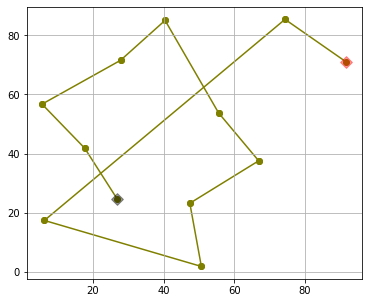

In [26]:
plt.figure(figsize=(6,5))
tri = np.zeros([len(cenoise)]) #노드들의 연결 간선 수 저장용 array : triple
shortest = np.array([]) #최단경로 저장용 array : shortest path
table = [] #노드들의 연결 현황을 나타낼 list

len_cenoise = len(cenoise)

# 출발, 도착점을 셋팅하고 표에 출력
table, m_start, m_end = set_point(cenoise_eu, table, len_cenoise)
tri, shortest = draw_line(tri, cenoise, int(m_start[0]), int(m_start[1]), m_start, shortest)
tri, shortest = draw_line(tri, cenoise, int(m_end[0]), int(m_end[1]), m_end, shortest)

############################# kruskal 함수 호출
is_break, tri_copy, shortest_copy, table_copy = kruskal(tri.copy(), shortest.copy(), deepcopy(table), cenoise_eu, len_cenoise)

# is_break == 0인 경우는 간선이 다 연결되지 않고 cenoise_eu를 모두 검사하여 종료되었다는 뜻
if (is_break == 0):
    print("incomplete terminateion")
        
# 최단경로 모아둔 리스트를 정렬
shortest_copy = np.reshape(shortest_copy,(len_cenoise-1,3))

# 노드들(투명), 시작1.시작2.종료(마름모) 추가로 출력 ---- (zorder 수가 높을 수록 상위에 노출됨)
plt.scatter(end_point[0], end_point[1], marker = 'D', s=70, color = 'black', alpha = 0.4, zorder = 2)
plt.scatter(start_point_1[0], start_point_1[1], marker = 'D', s=70, color = 'red', alpha = 0.4, zorder = 2)

plt.grid(True)
plt.show()

↓ 확인용 출력(추후 삭제)

In [27]:
testtt = [int(x) for x in table_copy[0]]
print(testtt)
print('최단경로 : ',np.sum(shortest_copy[:,2]))
#print(shortest)

[11, 9, 6, 2, 1, 7, 0, 4, 8, 5, 3, 10]
최단경로 :  350.2767982660946
